In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
delta_barnes_variation = np.array(pd.read_csv('delta_barnes_variation.csv', sep=','))

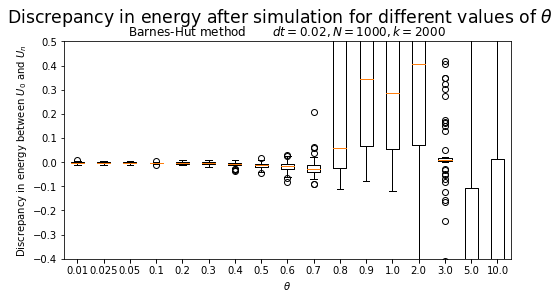

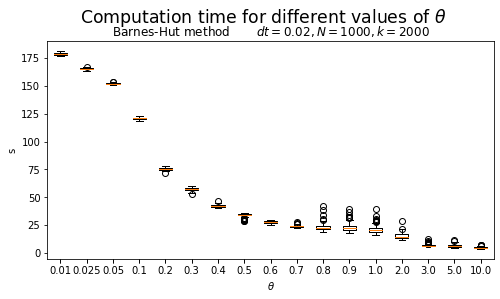

In [20]:
def boxPlotMethod(data, title, ax, ylabel, ylims=None):
    sets = np.array([], ndmin=2)
    lbls = np.array([], ndmin=2)
    groups = np.unique(data[:,0])
    ax.set_xticklabels(groups)
    ax.set_xticks(np.arange(1,groups.size+1))
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel(ylabel)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.set_title(title)
    i = 1
    values = {}
    for x in groups:
        values[x] = data[data[:,0] == x][:,1]
        #ax.boxplot(data[data[:,0] == x][:,1]) #, positions=[i], labels=[x], widths = 0.5)
        #i += 1
    ax.boxplot(values.values())
    ax.set_xticklabels(groups)

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))
fig1, ax1 = plt.subplots(figsize=(8,4))
mainTitle = r"Discrepancy in energy after simulation for different values of $\theta$"
params = "Barnes-Hut method\t" + r"$dt = 0.02, N=1000, k=2000$"
fig1.suptitle(mainTitle, fontsize = 'xx-large', y=1.0)
boxPlotMethod(delta_barnes_variation[:,1:3], params, ax1, r"Discrepancy in energy between $U_0$ and $U_n$", (-0.4,0.5))

fig2, ax2 = plt.subplots(figsize=(8,4))
mainTitle = r"Computation time for different values of $\theta$"
fig2.suptitle(mainTitle, fontsize = 'xx-large', y=1.0)
boxPlotMethod(delta_barnes_variation[:,[1,3]], params, ax2, "s")

fig1.savefig('energy_conservation_barnes.pdf')
fig2.savefig('computation_time_barnes.pdf')

plt.show()